In [1]:
import os
import pandas as pd
import numpy as np
from ops.imports_ipython import *
import ops.aggregate as aggregate 

### Set directory parameters:

In [2]:
# Set screen directories
aggregate_function_home = "/lab/barcheese01/screens"
aggregate_function_dataset = "aconcagua"
home = os.path.join(aggregate_function_home, aggregate_function_dataset)

# Change working directory to home
os.chdir(home)

# Make directories
os.makedirs("aggregate_4/hdf", exist_ok=True)
os.makedirs("aggregate_4/tif", exist_ok=True)

##### load a subset of the data

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `population_feature`: The column name that identifies your perturbation groups (e.g., 'gene_symbol_0' for CRISPR screens, 'treatment' for drug screens)

Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis.

In [3]:
population_feature = 'gene_symbol_0'

In [4]:
# Load subset of data -- may take ~1 minute
raw_df = aggregate.load_hdf_subset('merge_3/hdf/merged_final.hdf', n_rows=50000, population_feature=population_feature)
raw_df.to_hdf('aggregate_4/hdf/final_merged_subset.hdf', key='data', mode='w')
pd.Series(raw_df.columns).to_csv('aggregate_4/column_names.csv', index=False)
print(f"Loaded {len(raw_df)} cells with {len(raw_df.columns)} features")

Reading first 50,000 rows from merge_3/hdf/merged_final.hdf
Unique populations: 4913
well
A2    9349
B2    8794
A3    8158
A1    8089
B1    7827
B3    7783
Name: count, dtype: int64


/tmp/ipykernel_4066885/628507742.py:3: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['well', 'sgRNA_0', 'gene_symbol_0', 'mapped_single_gene'], dtype='object')]

  raw_df.to_hdf('aggregate_4/hdf/final_merged_subset.hdf', key='data', mode='w')


Loaded 50000 cells with 1683 features


##### remove unassigned cells

In [5]:
clean_df = aggregate.clean_cell_data(raw_df, population_feature, filter_single_gene=False)
del raw_df

Found 37291 cells with assigned perturbations


##### apply feature transformations

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `transformations`: CSV file containing feature transformation specifications. Each row defines a feature pattern and its transformation (e.g., 'log(feature)', 'log(feature-1)'), and should have a feature and transformation column
- `channels`: List of channels to apply feature transformations to (used to expand feature patterns like 'cell_{channel}_haralick_5_0')

Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis.

In [6]:
transformations = pd.read_csv('aggregate_4/transformations.csv')
channels = ['dapi','tubulin','gh2ax','phalloidin']

In [7]:
transformed_df = aggregate.feature_transform(
    clean_df, 
    transformations, 
    channels
)
transformed_df

/lab/barcheese01/mdiberna/OpticalPooledScreens/venv_ops_new/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,well,tile,cell_0,i_0,j_0,site,cell_1,i_1,j_1,distance,...,cell_number_neighbors_1,cell_percent_touching_1,cell_first_neighbor_distance,cell_second_neighbor_distance,cell_angle_between_neighbors,cytoplasm_number_neighbors_1,cytoplasm_percent_touching_1,cytoplasm_first_neighbor_distance,cytoplasm_second_neighbor_distance,cytoplasm_angle_between_neighbors
1,A1,149,605,1480.261176,1479.401569,52,272,111.262500,1375.250000,1.590704,...,4,0.794788,54.320514,65.869221,128.894449,4.0,0.525164,59.645575,64.493376,123.994176
3,B2,278,661,1480.886792,1479.774311,62,5283,1382.702128,732.372340,0.238346,...,5,0.909375,54.728719,66.860282,118.029498,5.0,0.591463,59.360331,66.340757,116.194445
4,B2,933,746,1481.030366,1480.300524,235,5381,1370.878788,724.181818,0.369455,...,2,0.634328,48.821684,53.070289,110.845837,2.0,0.412621,45.531960,52.447646,113.294614
5,B1,1214,603,1478.942463,1479.640514,314,2290,745.436242,726.194631,0.457858,...,4,0.836538,41.479966,65.788387,154.653263,4.0,0.497817,40.940814,62.584955,135.077540
6,A1,54,636,1480.818442,1480.801260,13,5319,1384.176471,1367.117647,1.441651,...,5,1.000000,62.547511,66.890849,134.947436,5.0,0.558882,58.667381,70.239941,92.606803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A2,723,578,1597.948601,1505.763826,187,2188,780.494845,1365.309278,0.255721,...,3,0.453258,62.377936,88.416452,42.069789,3.0,0.294659,67.689820,97.832116,42.225233
49995,A3,955,491,1388.888116,1400.789507,246,1911,726.417476,1337.475728,0.449554,...,5,0.566757,55.858484,86.638228,124.100090,5.0,0.377495,54.909409,83.430019,123.527450
49996,B3,939,677,1359.285940,1477.914692,238,2839,709.775510,1358.285714,0.305816,...,3,0.512367,52.270971,65.032001,117.446056,3.0,0.347722,54.478358,64.884495,119.139248
49997,B2,236,778,1432.430923,1369.033644,75,3108,719.031250,76.010417,0.584091,...,4,0.686154,62.427552,63.678504,79.130232,4.0,0.448352,62.603512,72.207233,72.141569


##### standardize features

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `control_prefix`: Prefix identifying control populations
- `group_columns`: Columns defining experimental groups (e.g., ['well'] for per-well standardization)
- `index_columns`: Columns uniquely identifying cells (e.g., ['tile', 'cell_0'])
- `cat_columns`: Categorical columns to preserve
- `feature_start`: First column containing measured features


We provide a useful function for suggesting these parameters, `suggest_parameters`. Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis.

In [8]:
aggregate.suggest_parameters(clean_df, population_feature)


Suggested Parameters:
--------------------------------------------------

Potential control prefixes found:
  - 'BPNT1'
  - 'NTF4'
  - 'INTS6'
  - 'nontargeting'
  - 'NT5C3B'
  - 'MNT'
  - 'INTS7'
  - 'FNTA'
  - 'TENT4B'
  - 'INTS10'
  - 'KNTC1'
  - 'INTS8'
  - 'INTS5'
  - 'TNNT2'
  - 'ARNTL2'
  - 'CCNT1'
  - 'TNNT1'
  - 'ANTXRL'
  - 'INTS3'
  - 'ZWINT'
  - 'INTS13'
  - 'INTS12'
  - 'CNTNAP1'
  - 'FNTB'
  - 'NTF3'
  - 'PCNT'
  - 'TRNT1'
  - 'INTS14'
  - 'INTS9'
  - 'B3GNT3'
  - 'SPINT1'
  - 'NT5C'
  - 'CNTROB'
  - 'INTS1'
  - 'DNTTIP2'
  - 'B3GNT4'
  - 'B3GNT2'
  - 'INTS11'
  - 'RINT1'
  - 'INTS4'
  - 'INTS2'

First few feature columns detected:
  - 'nucleus_dapi_mean'
  - 'nucleus_tubulin_mean'
  - 'nucleus_gh2ax_mean'
  - 'nucleus_phalloidin_mean'
  - 'nucleus_dapi_std'

Metadata columns detected:
  - Categorical: well, sgRNA_0, gene_symbol_0, mapped_single_gene


In [9]:
control_prefix = 'nontargeting'
group_columns = ['well']
index_columns = ['tile', 'cell_0']
cat_columns = ['gene_symbol_0', 'sgRNA_0']
feature_start = 'nucleus_dapi_mean'

In [10]:
# Identify features to standardize (all columns after mapped_single_gene)
feature_start_idx = transformed_df.columns.get_loc(feature_start)
target_features = transformed_df.columns[feature_start_idx:].tolist()
# Standardize the data
standardized_df = aggregate.grouped_standardization(
    transformed_df,
    population_feature=population_feature,
    control_prefix=control_prefix,
    group_columns=group_columns,
    index_columns=index_columns,
    cat_columns=cat_columns,
    target_features=target_features,
    drop_features=False
)
standardized_df

,well,tile,cell_0,i_0,j_0,site,cell_1,i_1,j_1,distance,...,cell_number_neighbors_1,cell_percent_touching_1,cell_first_neighbor_distance,cell_second_neighbor_distance,cell_angle_between_neighbors,cytoplasm_number_neighbors_1,cytoplasm_percent_touching_1,cytoplasm_first_neighbor_distance,cytoplasm_second_neighbor_distance,cytoplasm_angle_between_neighbors
0,A1,149,605,1480.261176,1479.401569,52,272,111.262500,1375.250000,1.590704,...,0.0000,0.326027,-0.549055,-0.274666,0.070169,0.0000,0.314122,0.017805,-0.443183,0.008602
1,B2,278,661,1480.886792,1479.774311,62,5283,1382.702128,732.372340,0.238346,...,0.6745,0.577121,-0.411808,-0.006661,-0.183054,0.6745,0.528361,0.199351,0.019087,-0.364616
2,B2,933,746,1481.030366,1480.300524,235,5381,1370.878788,724.181818,0.369455,...,-1.3490,-0.619553,-1.127478,-1.515315,-0.328546,-1.3490,-0.700246,-1.397729,-1.472700,-0.430475
3,B1,1214,603,1478.942463,1479.640514,314,2290,745.436242,726.194631,0.457858,...,0.0000,0.569007,-2.075654,-0.087592,0.565036,0.0000,0.341531,-2.100265,-0.537135,0.131506
4,A1,54,636,1480.818442,1480.801260,13,5319,1384.176471,1367.117647,1.441651,...,0.6745,1.160196,0.445567,-0.171546,0.197718,0.6745,0.523300,-0.075572,0.125663,-0.633293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37286,A2,723,578,1597.948601,1505.763826,187,2188,780.494845,1365.309278,0.255721,...,-0.6745,-1.913519,0.826159,2.962513,-2.082716,-0.6745,-1.774630,1.378850,3.958161,-1.809292
37287,A3,955,491,1388.888116,1400.789507,246,1911,726.417476,1337.475728,0.449554,...,0.6745,-0.962153,-0.125043,2.012393,0.031300,0.6745,-0.819426,-0.367996,1.690091,-0.009539
37288,B3,939,677,1359.285940,1477.914692,238,2839,709.775510,1358.285714,0.305816,...,-0.6745,-1.249369,-0.617851,-0.090949,0.035099,-0.6745,-1.040086,-0.451023,-0.142231,0.054870
37289,B2,236,778,1432.430923,1369.033644,75,3108,719.031250,76.010417,0.584091,...,0.0000,-0.394071,0.520947,-0.354754,-0.970887,0.0000,-0.454786,0.573916,0.649006,-1.365117


##### add file names

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `channel_dict`: Maps fluorescence channels to their corresponding image files
- `base_ph_file_path`: Points to the "input_ph_tif" folder in your home directory

Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis.

In [11]:
channel_dict = {
    'dapi-tubulin': 'Channel-DAPI_1x1-GFP_1x1.tif',
    'gh2ax': 'Channel-A594_1x1.tif',
    'phalloidin': 'Channel-AF750_1x1.tif',
}
base_ph_file_path = os.path.join(home, "input_ph_tif")

In [12]:
standardized_df = aggregate.add_filenames(standardized_df,base_ph_file_path=base_ph_file_path,multichannel_dict=channel_dict)
standardized_df

,well,tile,cell_0,i_0,j_0,site,cell_1,i_1,j_1,distance,...,cell_second_neighbor_distance,cell_angle_between_neighbors,cytoplasm_number_neighbors_1,cytoplasm_percent_touching_1,cytoplasm_first_neighbor_distance,cytoplasm_second_neighbor_distance,cytoplasm_angle_between_neighbors,filename_dapi-tubulin,filename_gh2ax,filename_phalloidin
0,A1,149,605,1480.261176,1479.401569,52,272,111.262500,1375.250000,1.590704,...,-0.274666,0.070169,0.0000,0.314122,0.017805,-0.443183,0.008602,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...
1,B2,278,661,1480.886792,1479.774311,62,5283,1382.702128,732.372340,0.238346,...,-0.006661,-0.183054,0.6745,0.528361,0.199351,0.019087,-0.364616,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...
2,B2,933,746,1481.030366,1480.300524,235,5381,1370.878788,724.181818,0.369455,...,-1.515315,-0.328546,-1.3490,-0.700246,-1.397729,-1.472700,-0.430475,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...
3,B1,1214,603,1478.942463,1479.640514,314,2290,745.436242,726.194631,0.457858,...,-0.087592,0.565036,0.0000,0.341531,-2.100265,-0.537135,0.131506,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...
4,A1,54,636,1480.818442,1480.801260,13,5319,1384.176471,1367.117647,1.441651,...,-0.171546,0.197718,0.6745,0.523300,-0.075572,0.125663,-0.633293,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37286,A2,723,578,1597.948601,1505.763826,187,2188,780.494845,1365.309278,0.255721,...,2.962513,-2.082716,-0.6745,-1.774630,1.378850,3.958161,-1.809292,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...
37287,A3,955,491,1388.888116,1400.789507,246,1911,726.417476,1337.475728,0.449554,...,2.012393,0.031300,0.6745,-0.819426,-0.367996,1.690091,-0.009539,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...
37288,B3,939,677,1359.285940,1477.914692,238,2839,709.775510,1358.285714,0.305816,...,-0.090949,0.035099,-0.6745,-1.040086,-0.451023,-0.142231,0.054870,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...
37289,B2,236,778,1432.430923,1369.033644,75,3108,719.031250,76.010417,0.584091,...,-0.354754,-0.970887,0.0000,-0.454786,0.573916,0.649006,-1.365117,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...,/lab/barcheese01/screens/aconcagua/input_ph_ti...


##### split mitotic and interphase data

The following cell contains crucial variables that need to be set according to your specific experimental setup and data organization. Please review and modify these variables as needed before proceeding with the analysis.

- `mitotic_threshold_variable`: Column name used to identify mitotic cells (e.g., 'nucleus_dapi_int' for DAPI intensity)
- `mitotic_threshold`: Numerical threshold to separate mitotic from interphase cells (examine intensity histogram to determine appropriate value)

Ensure these variables accurately reflect your experimental setup to guarantee correct data processing and analysis. Trying different approaches, splitting the data by more than one variable may be best.

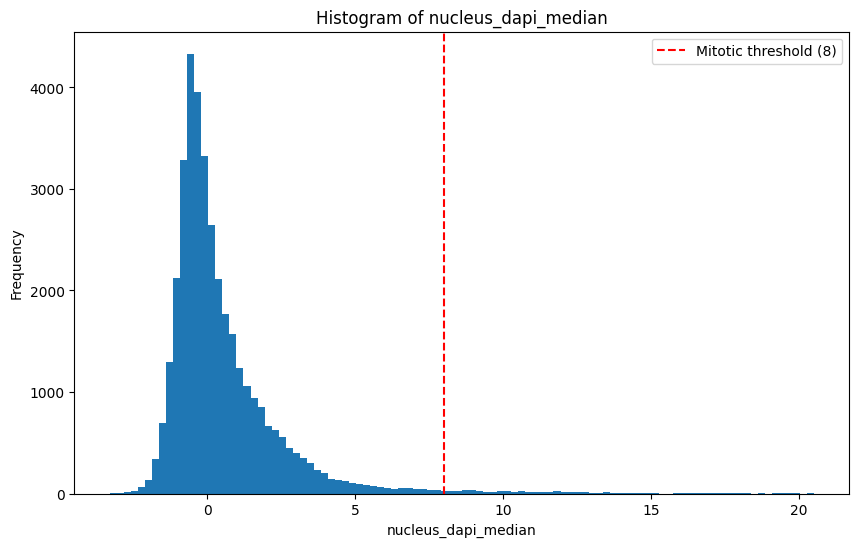

Number of mitotic cells: 535
Total cells: 37,291
Percent mitotic: 1.43%


In [13]:
mitotic_threshold_variable = 'nucleus_dapi_median'
mitotic_threshold = 8

percent_mitotic = aggregate.plot_mitotic_distribution_hist(
    standardized_df, 
    threshold_variable=mitotic_threshold_variable,
    threshold_value=mitotic_threshold
)

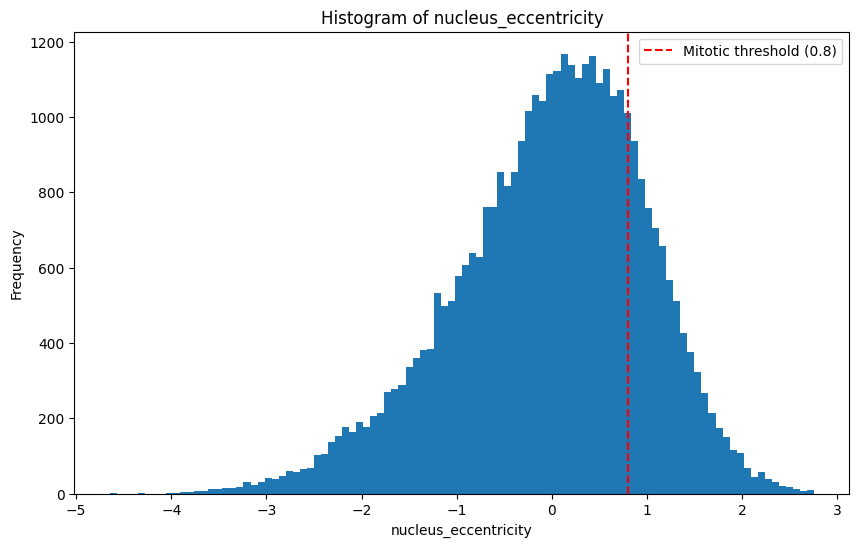

Number of mitotic cells: 7,823
Total cells: 37,291
Percent mitotic: 20.98%


In [14]:
mitotic_threshold_variable = 'nucleus_eccentricity'
mitotic_threshold = 0.8

percent_mitotic = aggregate.plot_mitotic_distribution_hist(
    standardized_df, 
    threshold_variable=mitotic_threshold_variable,
    threshold_value=mitotic_threshold
)

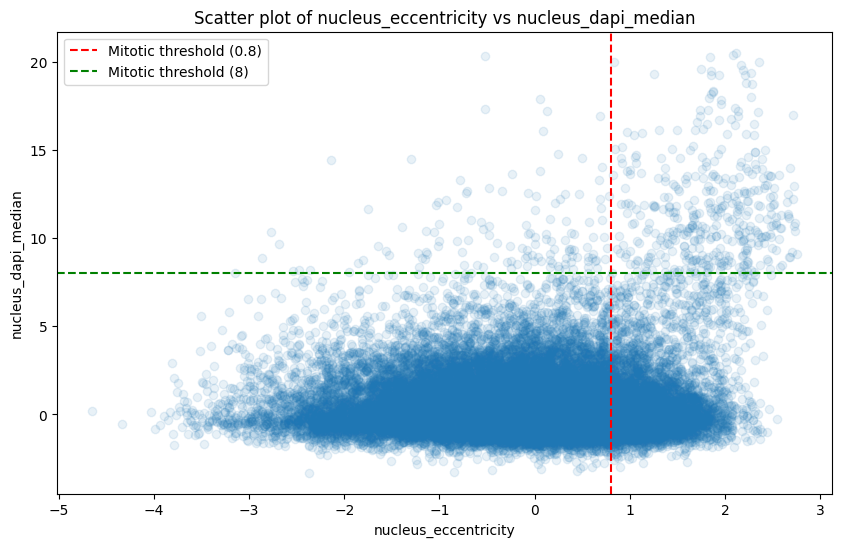

Number of mitotic cells: 402
Total cells: 37,291
Percent mitotic: 1.08%


In [15]:
threshold_variable_x = 'nucleus_eccentricity'
threshold_variable_y = 'nucleus_dapi_median'
threshold_value_x = 0.8
threshold_value_y = 8

aggregate.plot_mitotic_distribution_scatter(
    standardized_df,
    threshold_variable_x=threshold_variable_x,
    threshold_variable_y=threshold_variable_y,
    threshold_x=threshold_value_x,
    threshold_y=threshold_value_y,
    alpha=0.1
)

In [16]:
mitotic_threshold_variable = 'nucleus_dapi_median'
mitotic_threshold = 7

conditions = {
    mitotic_threshold_variable: (mitotic_threshold, 'greater'),
}
mitotic_df, interphase_df = aggregate.split_mitotic_simple(standardized_df, conditions)
print(f"Subsetting {len(mitotic_df)} mitotic cells and {len(interphase_df)} interphase cells")

Subsetting 694 mitotic cells and 36597 interphase cells


##### generate montages of mitotic and interphase cells

In [17]:
plotting_dict = {
    'dapi': {'filename': 'dapi-tubulin', 'channel': 0},
    'tubulin': {'filename': 'dapi-tubulin', 'channel': 1},
    'gh2ax': {'filename': 'gh2ax'},
    'phalloidin': {'filename': 'phalloidin'}
}

display_ranges = {
    'dapi': [(0, 14000)],
    'tubulin': [(0, 13000)],
    'gh2ax': [(0, 6000)],
    'phalloidin': [(350, 2000)]
}

# Default
aggregate.create_mitotic_cell_montage(
    df=mitotic_df,
    output_dir='aggregate_4/tif',
    output_prefix='mitotic',
    channels=plotting_dict,
    display_ranges=display_ranges
)

# Sorted by median dapi intensity
aggregate.create_mitotic_cell_montage(
    df=mitotic_df,
    output_dir='aggregate_4/tif',
    output_prefix='mitotic_sorted_nucleus_dapi_median',
    channels=plotting_dict,
    display_ranges=display_ranges,
    selection_params={
        'method': 'sorted',
        'sort_by': 'nucleus_dapi_median',
        'ascending': True
    }
)

Saved dapi montage to aggregate_4/tif/mitotic_dapi.tif
Saved tubulin montage to aggregate_4/tif/mitotic_tubulin.tif
Saved gh2ax montage to aggregate_4/tif/mitotic_gh2ax.tif
Saved phalloidin montage to aggregate_4/tif/mitotic_phalloidin.tif
Saved dapi montage to aggregate_4/tif/mitotic_sorted_nucleus_dapi_median_dapi.tif
Saved tubulin montage to aggregate_4/tif/mitotic_sorted_nucleus_dapi_median_tubulin.tif
Saved gh2ax montage to aggregate_4/tif/mitotic_sorted_nucleus_dapi_median_gh2ax.tif
Saved phalloidin montage to aggregate_4/tif/mitotic_sorted_nucleus_dapi_median_phalloidin.tif


##### re-standardize mitotic and interphase data

In [18]:
# Re-standardize mitotic population
mitotic_standardized_df = aggregate.grouped_standardization(
    mitotic_df,
    population_feature=population_feature,
    control_prefix=control_prefix,
    group_columns=group_columns,
    index_columns=index_columns,
    cat_columns=cat_columns,
    target_features=target_features,
    drop_features=True
)

# Re-standardize interphase population
interphase_standardized_df = aggregate.grouped_standardization(
    interphase_df,
    population_feature=population_feature,
    control_prefix=control_prefix,
    group_columns=group_columns,
    index_columns=index_columns,
    cat_columns=cat_columns,
    target_features=target_features,
    drop_features=True
)

##### collapse to guide rna

In [19]:
mitotic_sgrna_df = aggregate.collapse_to_sgrna(
    mitotic_standardized_df,
    method='median',
    target_features=target_features,
    index_features=[population_feature, 'sgRNA_0'],
    control_prefix=control_prefix
)

interphase_sgrna_df = aggregate.collapse_to_sgrna(
    interphase_standardized_df,
    method='median',
    target_features=target_features,
    index_features=[population_feature, 'sgRNA_0'],
    control_prefix=control_prefix
)


Multiple control guides not found. Renaming to ensure uniqueness.
Multiple control guides not found. Renaming to ensure uniqueness.


##### collapse to gene

In [20]:
mitotic_gene_df = aggregate.collapse_to_gene(
    mitotic_sgrna_df,
    target_features=target_features,
    index_features=[population_feature]
)

interphase_gene_df = aggregate.collapse_to_gene(
    interphase_sgrna_df,
    target_features=target_features,
    index_features=[population_feature]
)

##### return summary of dataset

In [21]:
summary = pd.DataFrame({
    'Stage': ['Raw Data', 'Mitotic Cells', 'Interphase Cells',
              'Mitotic sgRNAs', 'Interphase sgRNAs',
              'Mitotic Genes', 'Interphase Genes'],
    'Count': [len(clean_df), len(mitotic_df), len(interphase_df),
              len(mitotic_sgrna_df), len(interphase_sgrna_df),
              len(mitotic_gene_df), len(interphase_gene_df)]
})
print("\nAnalysis Summary of Data Subset:")
print(summary)


Analysis Summary of Data Subset:
               Stage  Count
0           Raw Data  37291
1      Mitotic Cells    694
2   Interphase Cells  36597
3     Mitotic sgRNAs    630
4  Interphase sgRNAs  12350
5      Mitotic Genes    601
6   Interphase Genes   5101
